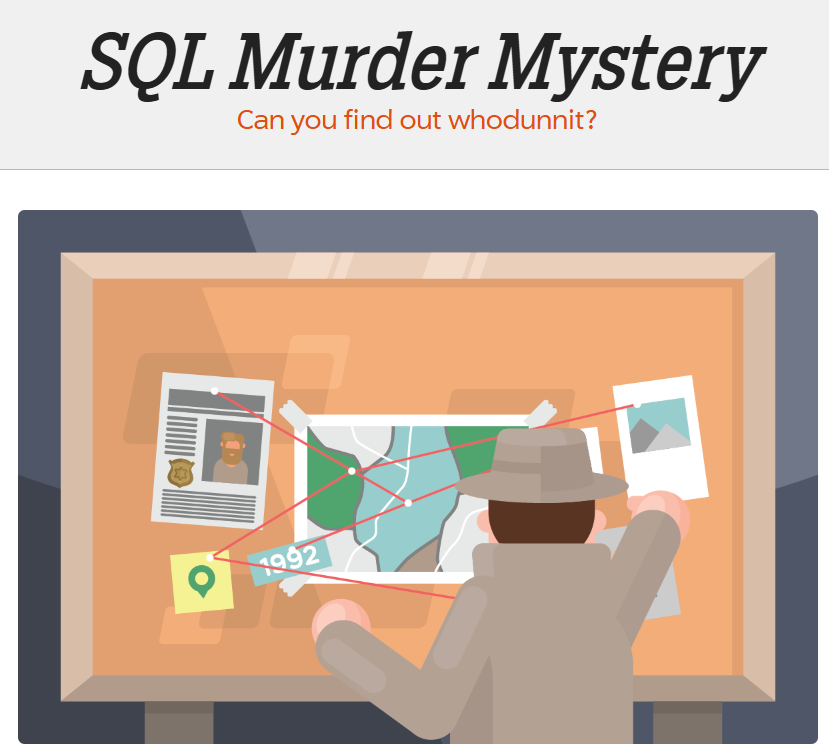

Стався злочин і детективу потрібна ваша допомога. Детектив дав вам протокол з місця злочину, але ви його чомусь загубили. Ви смутно пам’ятаєте, що злочином було ​вбивство ​, яке сталося десь ​15 січня 2018 року ​ і що воно сталося в ​SQL City ​. Почніть із отримання відповідного звіту про місце злочину з бази даних відділу поліції.

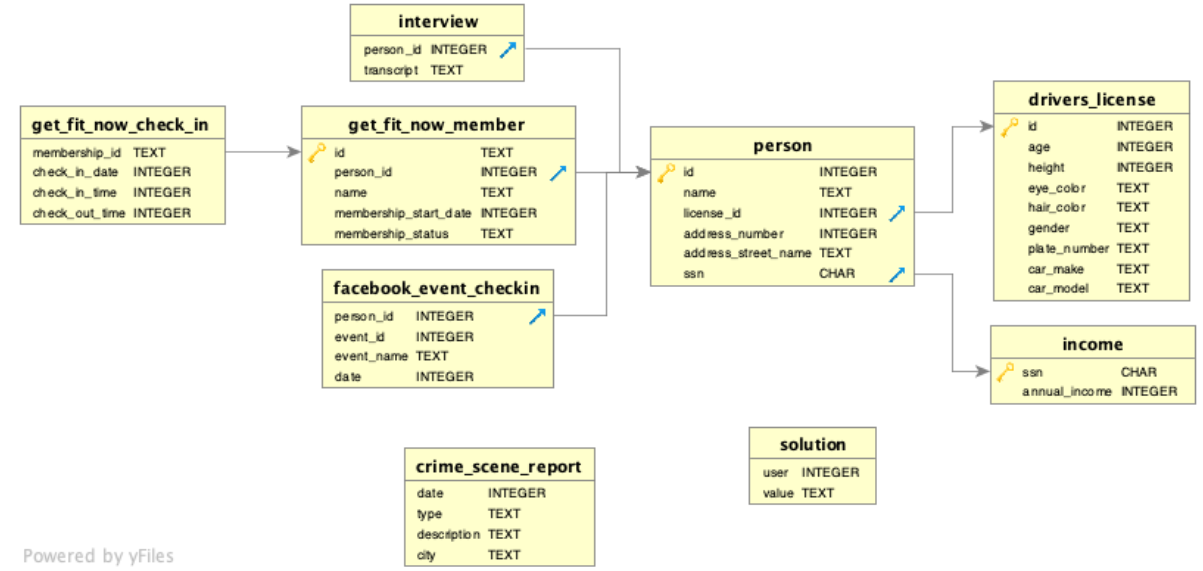

1. Дістати протокол злочину з crime_scene_report

In [ ]:
SELECT *
  FROM crime_scene_report
where date = 20180115
	and type = 'murder'
	and city = 'SQL City'

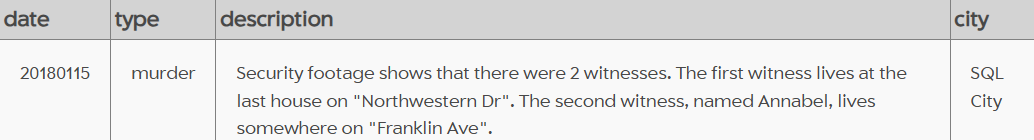

2. Знайти інфо про 2-х свідків з person:
 - перший живе в кінці вул Northwestern Dr
 - другого звуть Annabel та живе десь на вул Franklin Ave

In [ ]:
SELECT *
FROM person
where address_street_name = 'Northwestern Dr'
order by address_number desc
limit 1


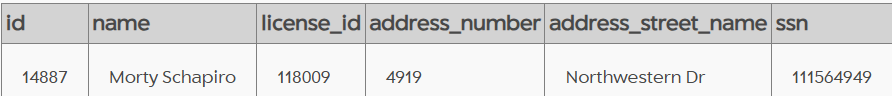

In [ ]:
SELECT *
	FROM person
where address_street_name = 'Franklin Ave'
	and name like 'Annabel%'

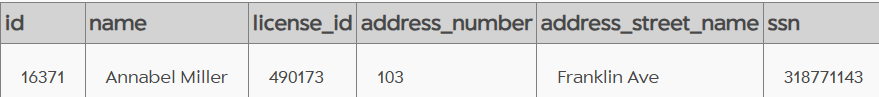

3. Знайдемо всю інфо про Morty Schapiro

In [ ]:
SELECT i.*,
	f.*
	FROM person p
join interview i on p.id = i.person_id
join facebook_event_checkin f on p.id = f.person_id
where p.id = 14887

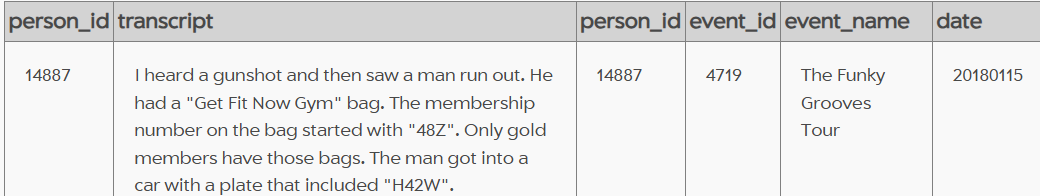

Покази 1 свідка Morty: Я почув постріл, а потім побачив, як вибіг чоловік. У нього була сумка «Get Fit Now Gym». Членський номер на сумці починався з «48Z». Тільки золоті члени мають такі сумки. Чоловік сів у автомобіль з номерним знаком «H42W».

Свідок 1 зареєстрований 15.01.2015 на The Funky Grooves Tour у Facebook

4. Знайдемо всю інфо про Annabel Miller

In [ ]:
SELECT i.*,
	f.*
	FROM person p
join interview i on p.id = i.person_id
join facebook_event_checkin f on p.id = f.person_id
where p.id = 16371

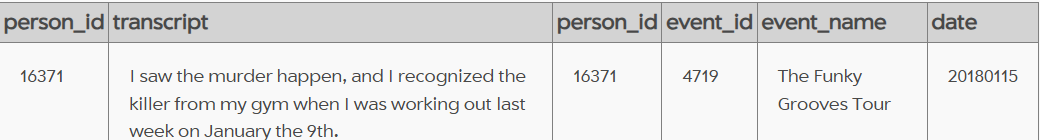

Покази 2 свідка Annabel: Я бачив, як сталося вбивство, і впізнав убивцю зі свого тренажерного залу, коли тренувався минулого тижня 9 січня.

Свідок 2 зареєстрований 15.01.2018 на The Funky Grooves Tour on Facebook

5. З показів 1 свідка Morty:

Чоловік з сумкою «Get Fit Now Gym», золотий член залу та членський номер на сумці починався з «48Z»

In [ ]:
SELECT *
	FROM get_fit_now_member g
where g.id like '48Z%'
	and g.membership_status = 'gold'

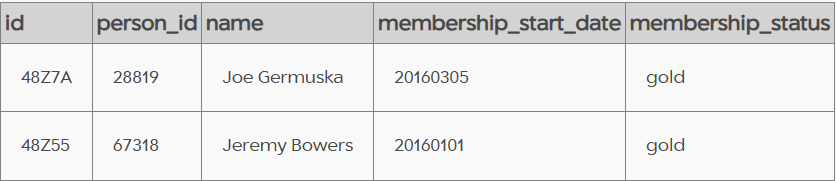

сів в автомобіль з номерним знаком «H42W»

In [ ]:
SELECT *
	FROM drivers_license
where plate_number like '%H42W%'

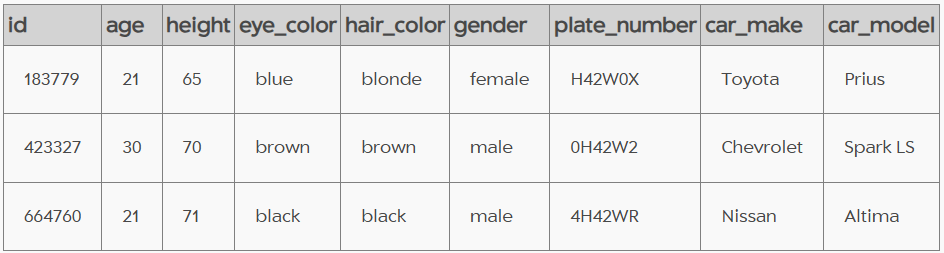

6. З показів 2 свідка Annabel: впізнала убивцю зі свого тренажерного залу, коли тренувалася минулого тижня 9 січня.

In [ ]:
SELECT m.id,
	m.person_id,
	m.name,
	m.membership_status,
	ch.check_in_date,
	ch.check_in_time,
	ch.check_out_time
	FROM get_fit_now_member m
left join get_fit_now_check_in ch on m.id = ch.membership_id
where person_id = 16371 and check_in_date = 20180109

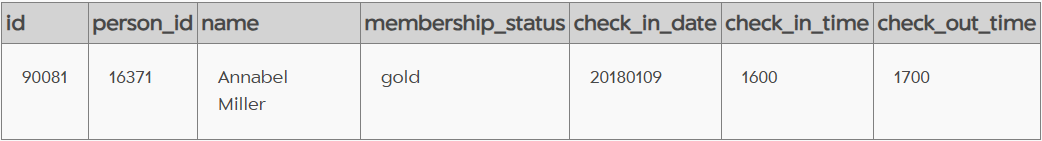

Хто ще тренувався в цей день з золотим статусом